##### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

# Load the dataset
medical = pd.read_csv(r"\MLOPS\data\raw\02_medical_records.csv")

mlflow.set_tracking_uri("http://localhost:5000")

## Data Understanding

In [2]:
medical.head(20)

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
# Check the basic statistics of numerical columns
print(medical.describe())

              age  resting_BP  cholesterol  fasting_BS      max_HR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

         old_peak    cv_issue  
count  918.000000  918.000000  
mean     0.887364    0.553377  
std      1.066570    0.497414  
min     -2.600000    0.000000  
25%      0.000000    0.000000  
50%      0.600000    1.000000  
75%      1.500000    1.000000  
max      6.200000    1.000000  


In [4]:
# Check the data types and non-null counts of each column
print(medical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   gender           918 non-null    object 
 2   chest_pain       918 non-null    object 
 3   resting_BP       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_BS       918 non-null    int64  
 6   resting_ECG      918 non-null    object 
 7   max_HR           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   old_peak         918 non-null    float64
 10  ST_slope         918 non-null    object 
 11  cv_issue         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


### Checking for Unique Values

In [5]:
print(medical.nunique())

age                 50
gender               2
chest_pain           4
resting_BP          67
cholesterol        222
fasting_BS           2
resting_ECG          3
max_HR             119
exercise_angina      2
old_peak            53
ST_slope             3
cv_issue             2
dtype: int64


### Checking for duplicate rows

In [6]:
duplicate_rows = medical.duplicated()
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

0


### Checking for null values

In [7]:
# Check for null values in each column
null_values = medical.isnull().sum()
print("Columns with null values:")
print(null_values)


Columns with null values:
age                0
gender             0
chest_pain         0
resting_BP         0
cholesterol        0
fasting_BS         0
resting_ECG        0
max_HR             0
exercise_angina    0
old_peak           0
ST_slope           0
cv_issue           0
dtype: int64


### Checking for Data Imbalance

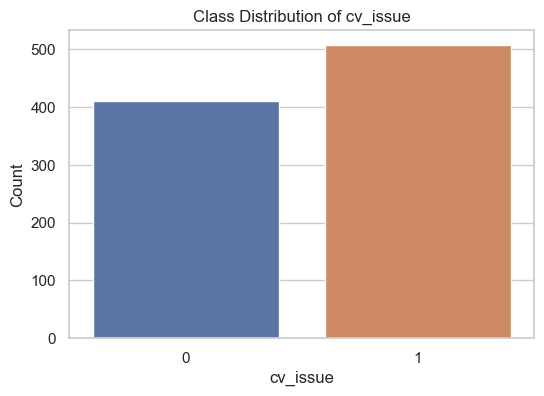

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='cv_issue', data= medical)
plt.title('Class Distribution of cv_issue')
plt.xlabel('cv_issue')
plt.ylabel('Count')
plt.show()


we can see that data is just slightly imbalanced

### Checking for Outliers

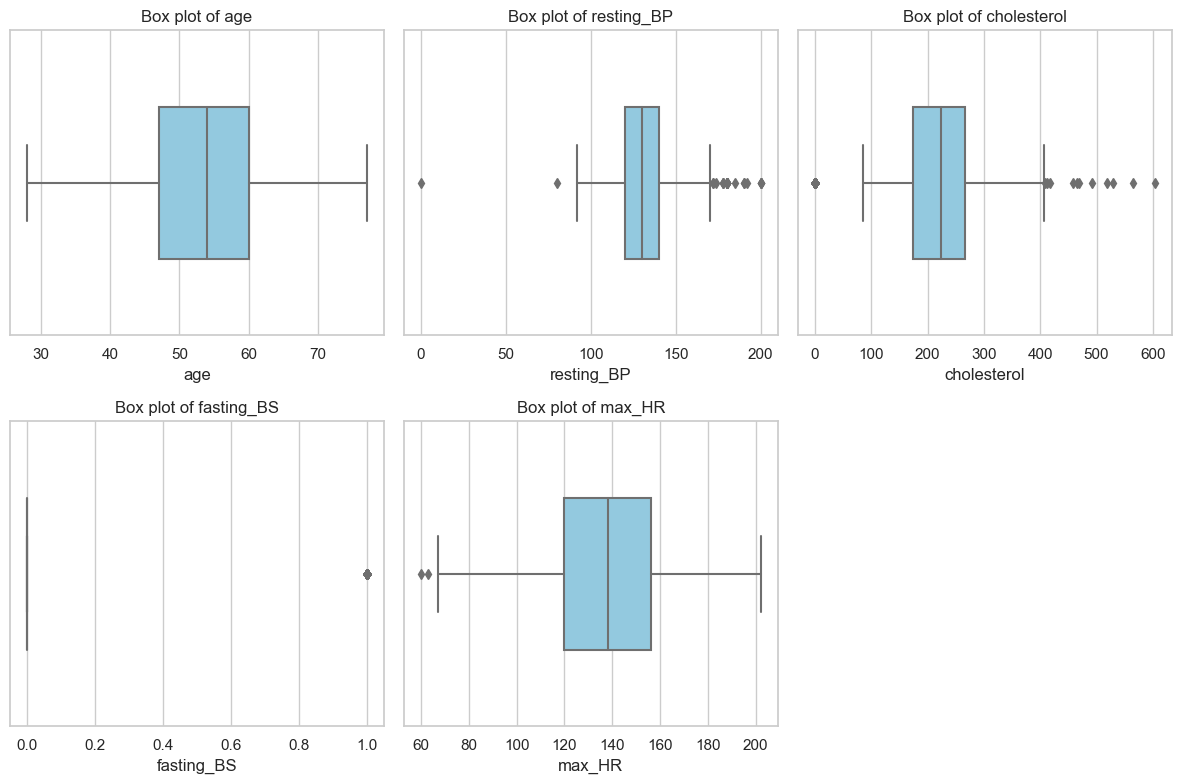

In [9]:
# Columns to check for outliers (assuming they are numeric columns)
numeric_columns = ['age', 'resting_BP', 'cholesterol', 'fasting_BS', 'max_HR']

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=medical[col], color='skyblue', width=0.5)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()



## Data Exploration

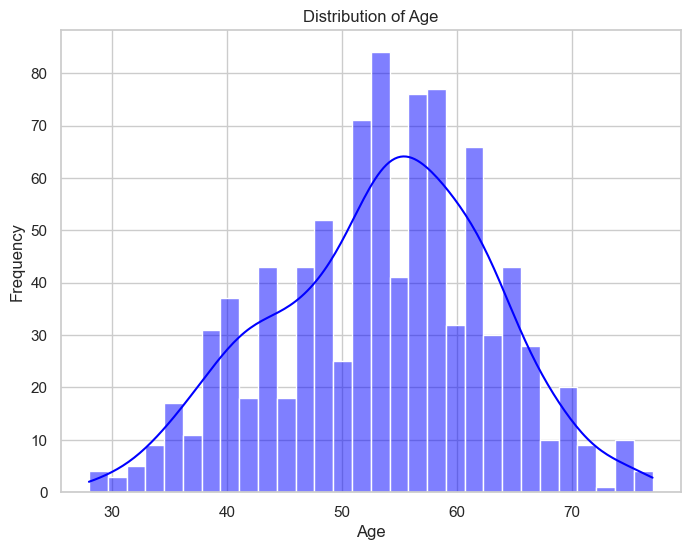

In [10]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(medical['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Most of the people in the dataset are mostly aged between 50 to 60

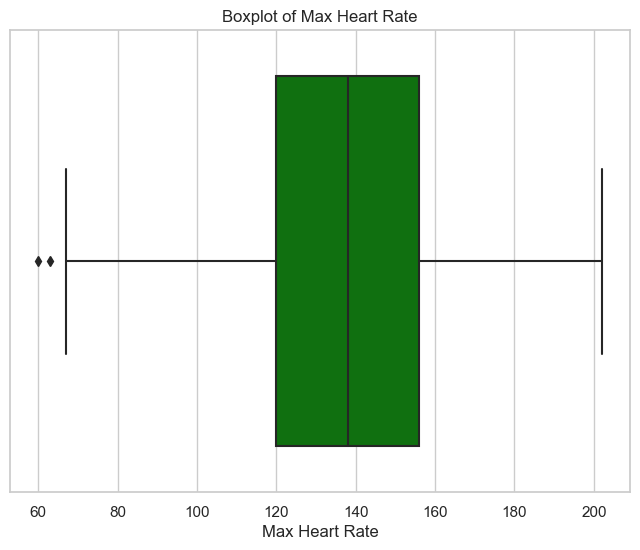

In [11]:
# Boxplot of Max Heart Rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=medical['max_HR'], color='green')
plt.title('Boxplot of Max Heart Rate')
plt.xlabel('Max Heart Rate')
plt.show()

Normal Heart rate lies within 120 to 160

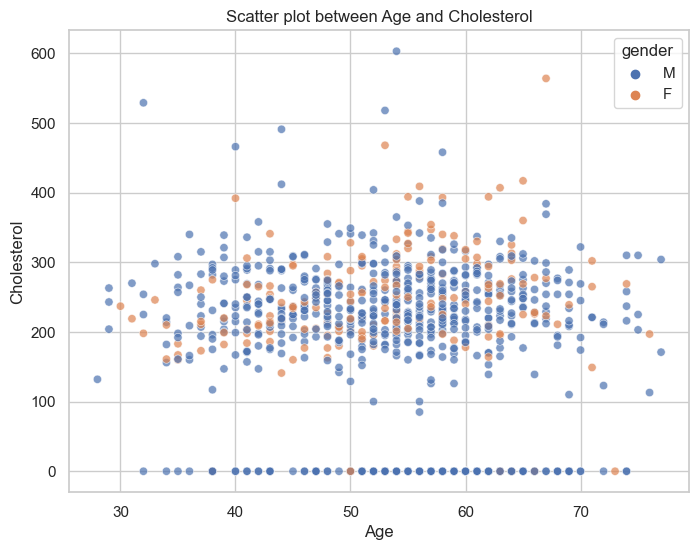

In [12]:
# Scatter plot between Age and Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='cholesterol', data=medical, hue='gender', alpha=0.7)
plt.title('Scatter plot between Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


Cholestrol is mainly within the 150 to 400 range accross all ages. However, we can see that there are quite some outliers for both age and cholestrol.

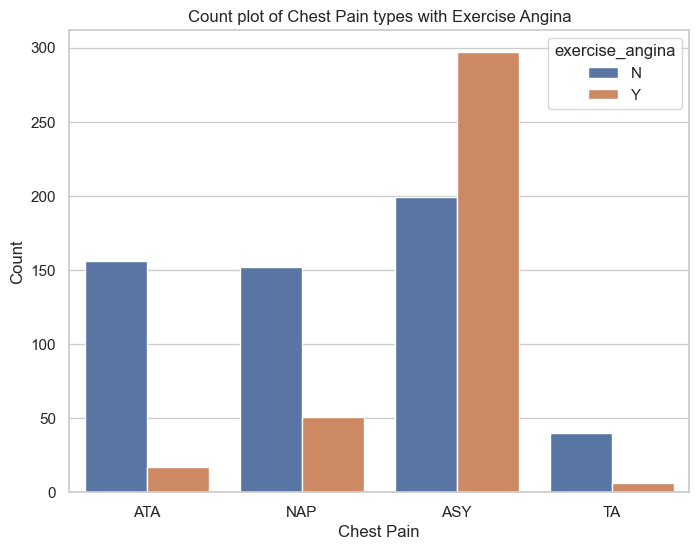

In [13]:
# Count plot of Chest Pain types
plt.figure(figsize=(8, 6))
sns.countplot(x='chest_pain', data=medical, hue='exercise_angina')
plt.title('Count plot of Chest Pain types with Exercise Angina')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.show()


Asymptomatic Angina is the most common type of chest pain

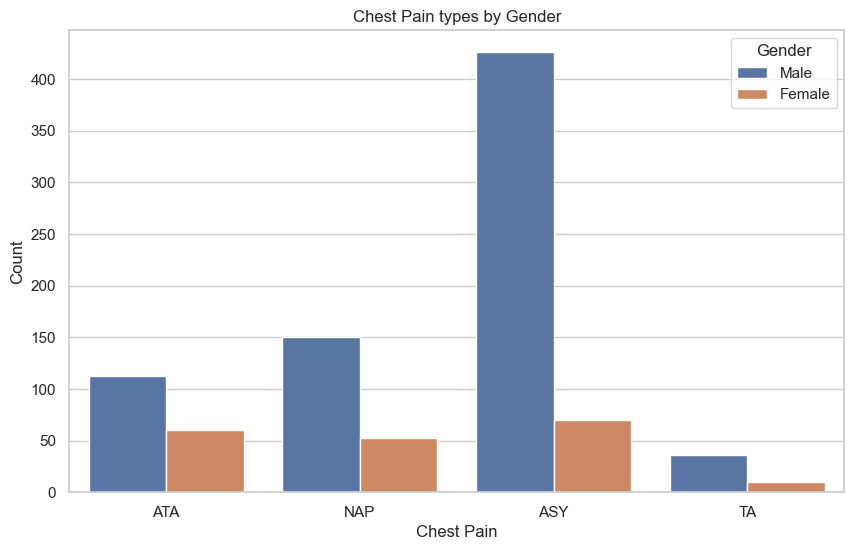

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chest_pain', data=medical, hue='gender')
plt.title('Chest Pain types by Gender')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()


Asymptomatic Chest Pain is not only the most common type of chest main but also mainly found in males.

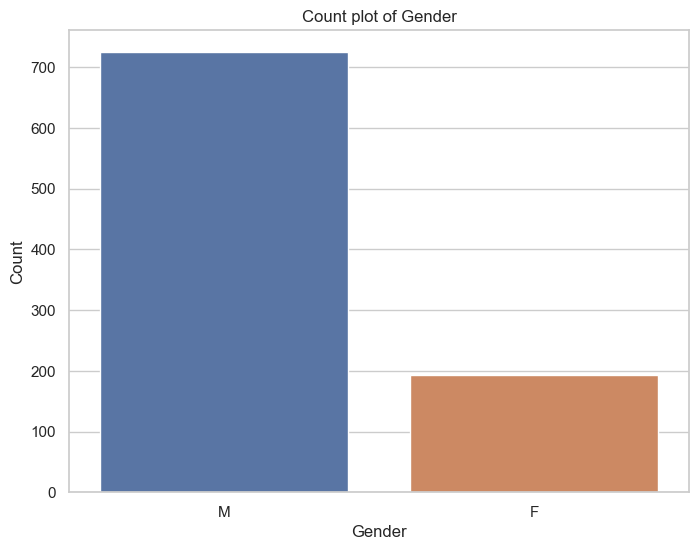

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=medical)
plt.title('Count plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The reason why the dataset shows most males are experiencing asymptomatic pain could be because most of the patients are male. 

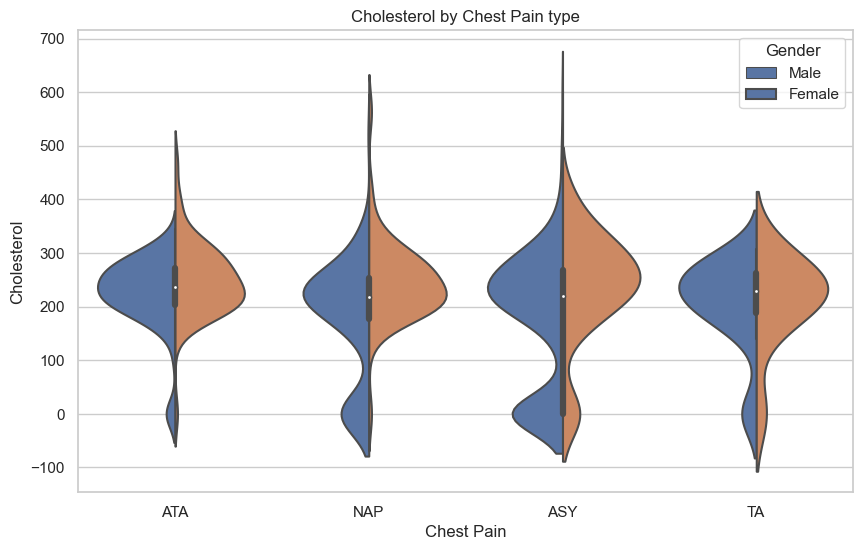

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='chest_pain', y='cholesterol', data=medical, hue='gender', split=True)
plt.title('Cholesterol by Chest Pain type')
plt.xlabel('Chest Pain')
plt.ylabel('Cholesterol')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()


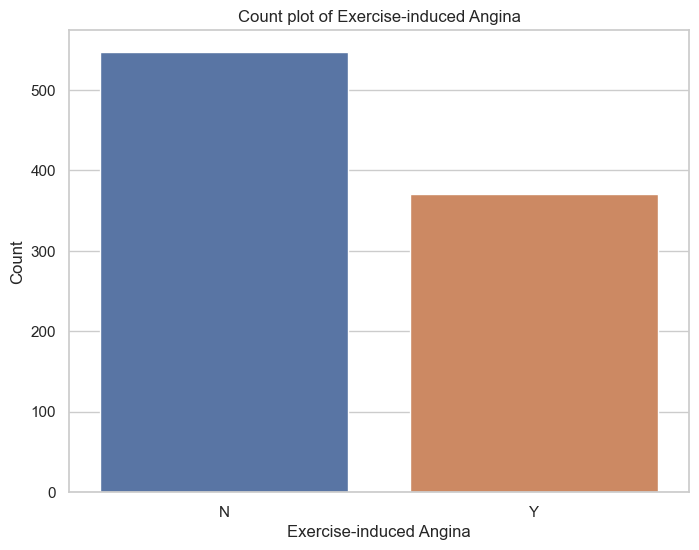

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='exercise_angina', data=medical)
plt.title('Count plot of Exercise-induced Angina')
plt.xlabel('Exercise-induced Angina')
plt.ylabel('Count')
plt.show()


More than half of the patients who are suffering from Angina are caused by exercise.

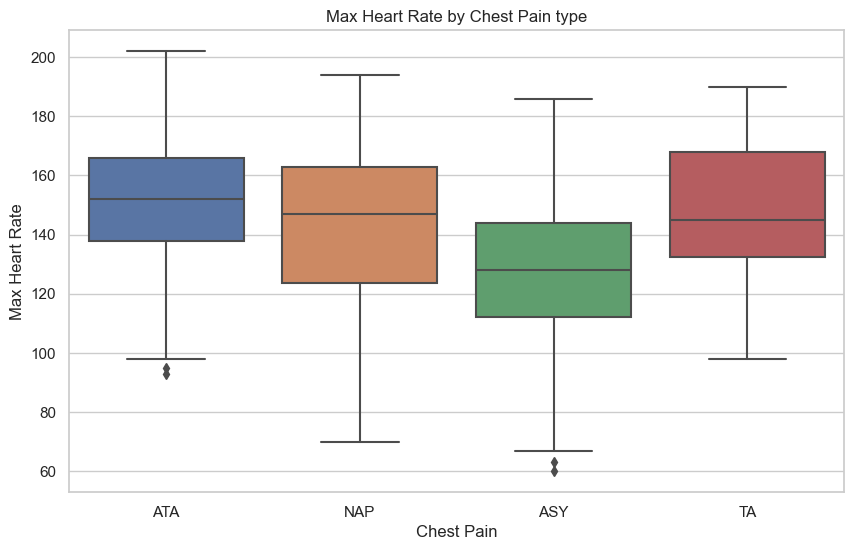

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='chest_pain', y='max_HR', data=medical)
plt.title('Max Heart Rate by Chest Pain type')
plt.xlabel('Chest Pain')
plt.ylabel('Max Heart Rate')
plt.show()


Chest pain type ATA shows that it has the highest heart rate among all the other chest pain types.

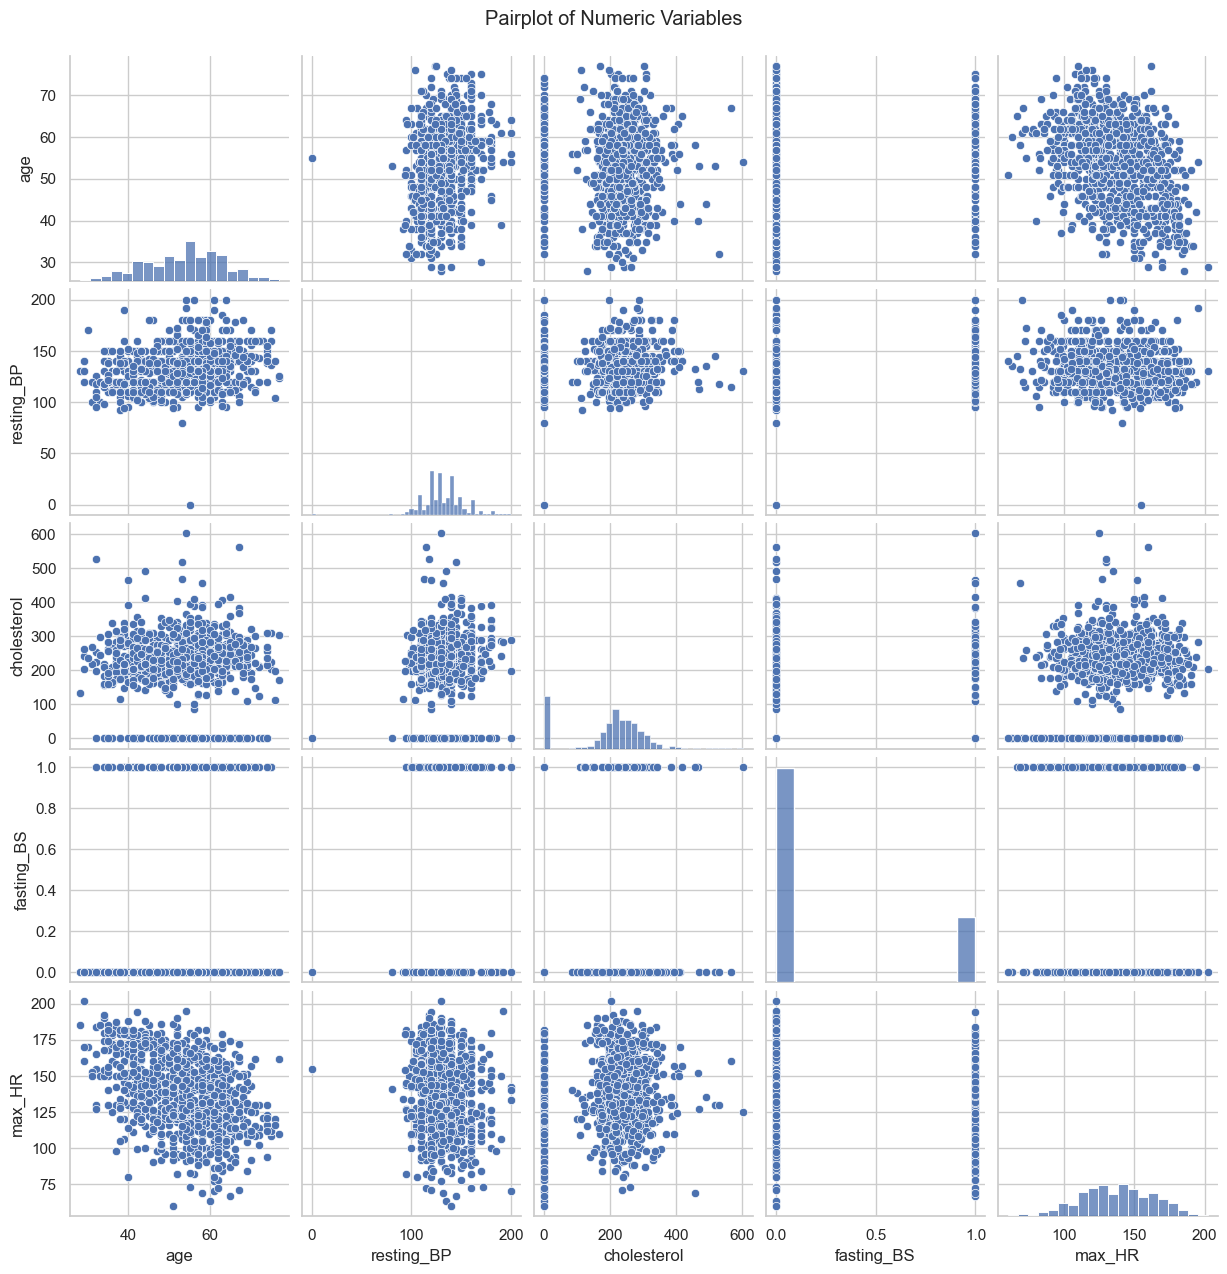

In [19]:
# Selecting numeric columns
numeric_columns = ['age', 'resting_BP', 'cholesterol', 'fasting_BS', 'max_HR']

# Creating a pairplot
sns.pairplot(data=medical[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


C:\Users\matth\AppData\Local\Temp\ipykernel_6148\3836390680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = medical.corr()


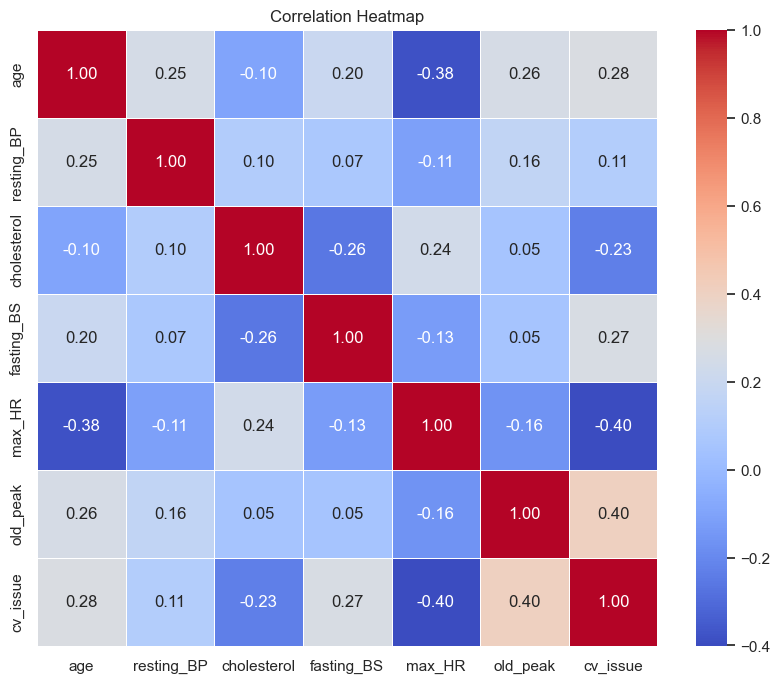

In [20]:
# Correlation heatmap of numerical variables
correlation_matrix = medical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The most obvious correlation from the matrix shows that old_peak has the strongest correlation to cv_issues

M    725
F    193
Name: gender, dtype: int64


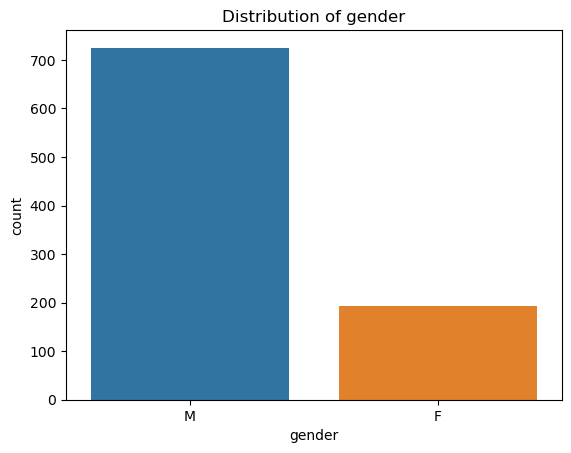

ASY    496
NAP    203
ATA    173
TA      46
Name: chest_pain, dtype: int64


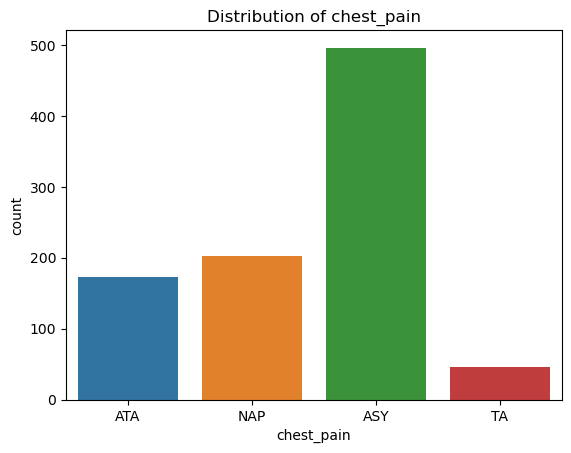

Normal    552
LVH       188
ST        178
Name: resting_ECG, dtype: int64


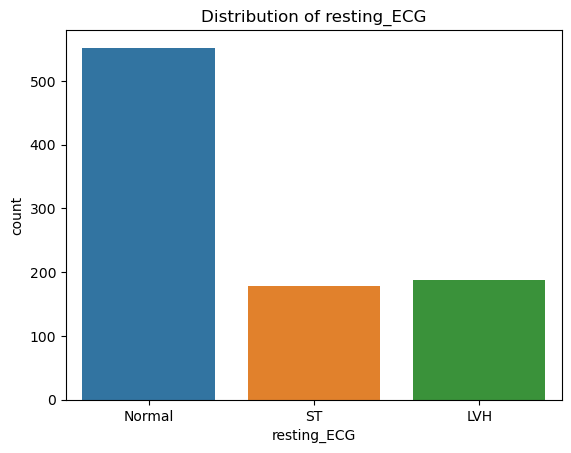

N    547
Y    371
Name: exercise_angina, dtype: int64


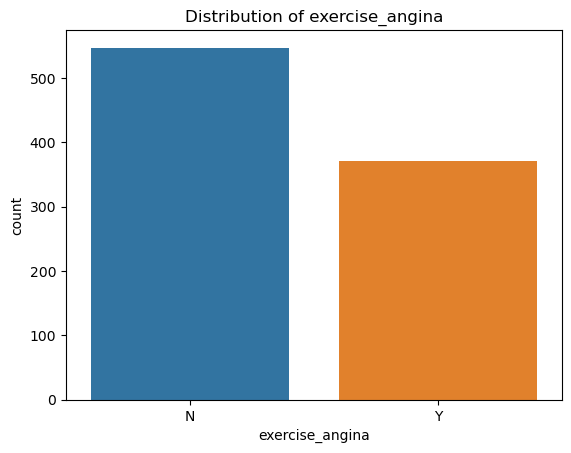

Flat    460
Up      395
Down     63
Name: ST_slope, dtype: int64


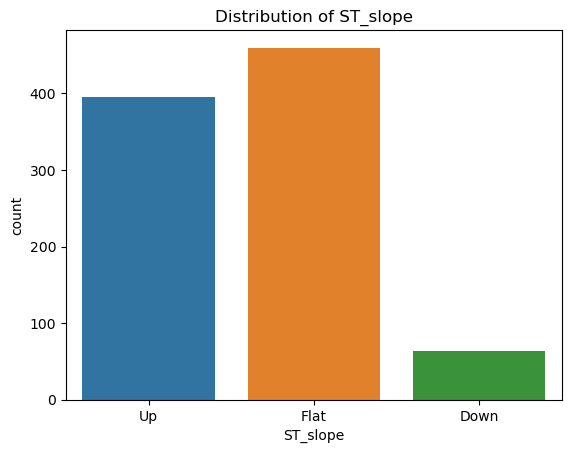

1    508
0    410
Name: cv_issue, dtype: int64


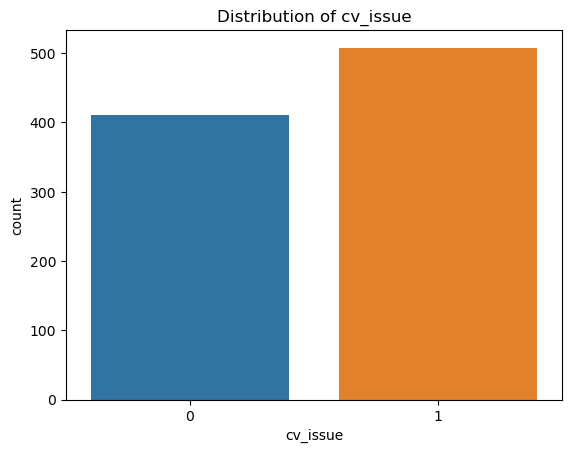

In [2]:
# Categorical variables
categorical_cols = ['gender', 'chest_pain', 'resting_ECG', 'exercise_angina', 'ST_slope', 'cv_issue']

for col in categorical_cols:
    print(medical[col].value_counts())
    sns.countplot(x=col, data=medical)
    plt.title(f'Distribution of {col}')
    plt.show()

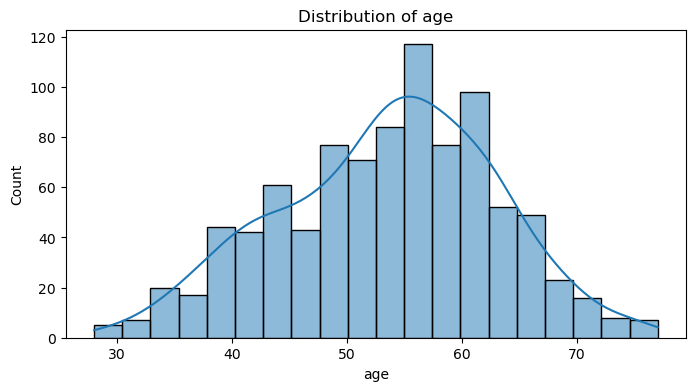

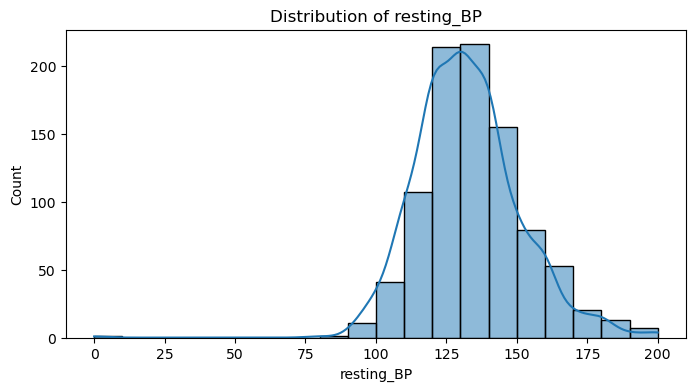

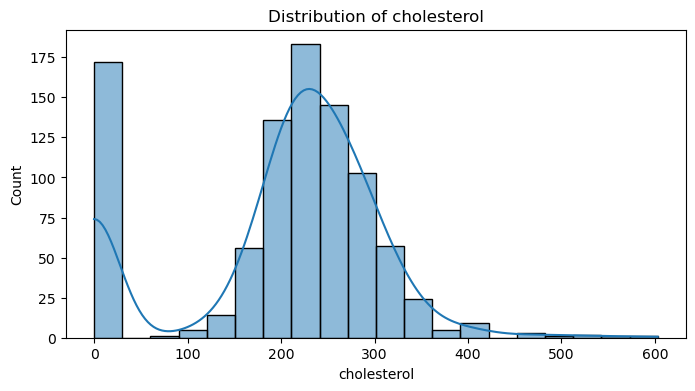

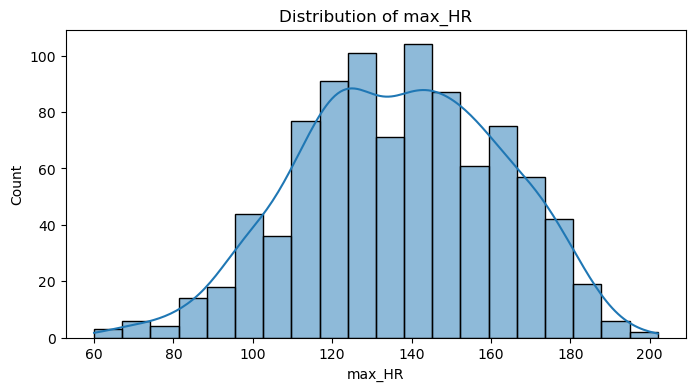

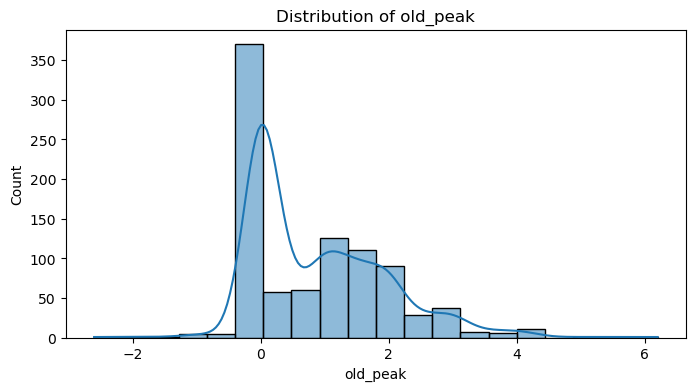

In [3]:
# Numerical variables
numerical_cols = ['age', 'resting_BP', 'cholesterol', 'max_HR', 'old_peak']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=medical, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [21]:
medical.head(10)

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#### Saving the final version

In [3]:
medical.to_csv("/MLOPS/data/final/02_medical_records.csv")

# Task 2

## 1. Feature Engineering
#### Normalisation, Feature Selection, Fixing Imbalanced Data, Feature Categorisation

In [22]:
from pycaret.classification import *
import pycaret
# Initialize the setup for PyCaret
exp = setup(data=medical, target='cv_issue', session_id=42,
            normalize=True,  # Apply normalization to numeric features
            feature_selection=True,  # Perform feature selection
            fix_imbalance=True,
            fix_imbalance_method='smote',
            bin_numeric_features=['age', 'resting_BP', 'cholesterol', 'max_HR'],  # Specify numeric features
            categorical_features=['gender', 'chest_pain', 'resting_ECG', 'exercise_angina', 'ST_slope'],
            # Specify categorical features for better handling
            fold=10  # Set the number of cross-validation folds
            )


,Description,Value
0,Session id,42
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(986, 3)"
5,Transformed train set shape,"(710, 3)"
6,Transformed test set shape,"(276, 3)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [37]:
#Types of models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 2. Model Training and Evaluation

In [38]:
# Compare and evaluate multiple models using cross-validation
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7181,0.7455,0.7296,0.7516,0.7393,0.4326,0.4341,0.4490
ada,Ada Boost Classifier,0.7101,0.7444,0.7294,0.7413,0.7336,0.4160,0.4181,0.4550
dt,Decision Tree Classifier,0.7087,0.7320,0.7014,0.7534,0.7248,0.4163,0.4191,0.3760
et,Extra Trees Classifier,0.7056,0.7374,0.6988,0.7502,0.7218,0.4103,0.4132,0.4460
lr,Logistic Regression,0.7024,0.7475,0.6925,0.7471,0.7181,0.4041,0.4056,0.3940
ridge,Ridge Classifier,0.7023,0.0000,0.6782,0.7547,0.7131,0.4059,0.4089,0.3580
lda,Linear Discriminant Analysis,0.7023,0.7474,0.6782,0.7547,0.7131,0.4059,0.4089,0.3760
lightgbm,Light Gradient Boosting Machine,0.6994,0.7585,0.6932,0.7464,0.7175,0.3974,0.4002,0.3860
knn,K Neighbors Classifier,0.6963,0.7347,0.7523,0.7204,0.7334,0.3812,0.3846,0.3880
gbc,Gradient Boosting Classifier,0.6962,0.7515,0.6902,0.7428,0.7144,0.3911,0.3936,0.4200


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [39]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6615,0.6542,0.7222,0.6842,0.7027,0.3105,0.3111
1,0.8154,0.8199,0.9167,0.7857,0.8462,0.6188,0.6303
2,0.7812,0.7867,0.8056,0.8056,0.8056,0.5556,0.5556
3,0.6719,0.6830,0.7222,0.7027,0.7123,0.3307,0.3308
4,0.7812,0.7778,0.8056,0.8056,0.8056,0.5556,0.5556
5,0.6562,0.6591,0.6286,0.7097,0.6667,0.3145,0.3170
6,0.7188,0.7133,0.7714,0.7297,0.7500,0.4291,0.4300
7,0.8281,0.7906,0.9143,0.8000,0.8533,0.6480,0.6565
8,0.5781,0.6084,0.6571,0.6053,0.6301,0.1412,0.1418


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## 3. Analysing the performance of trained model

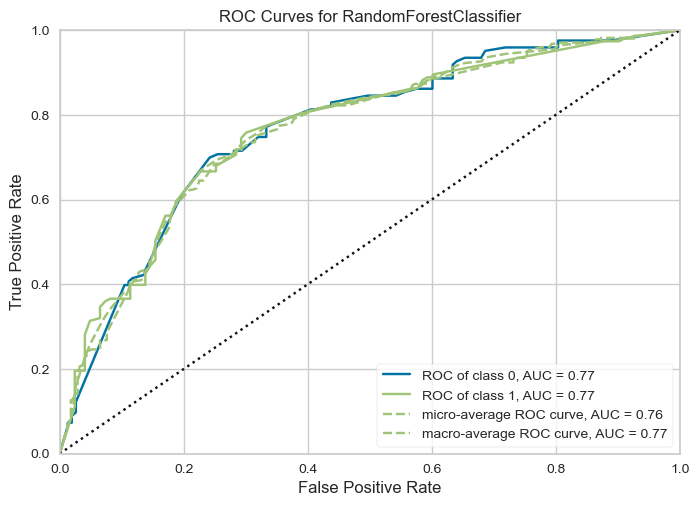

In [40]:
plot_model(tuned_model, plot = 'auc')

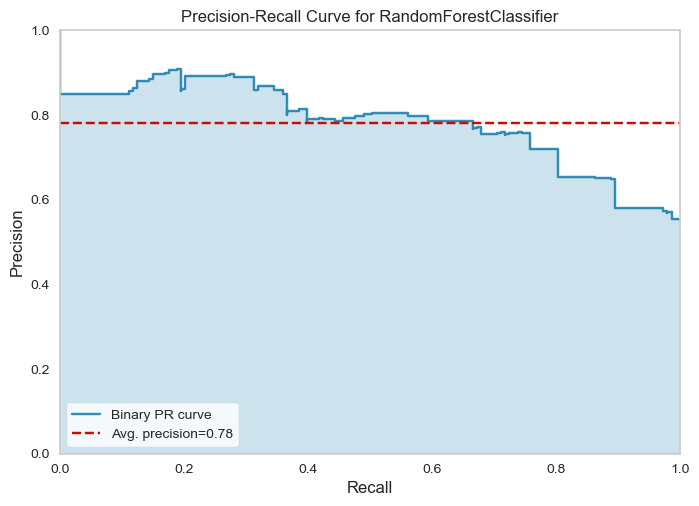

In [41]:
plot_model(tuned_model, plot = 'pr')

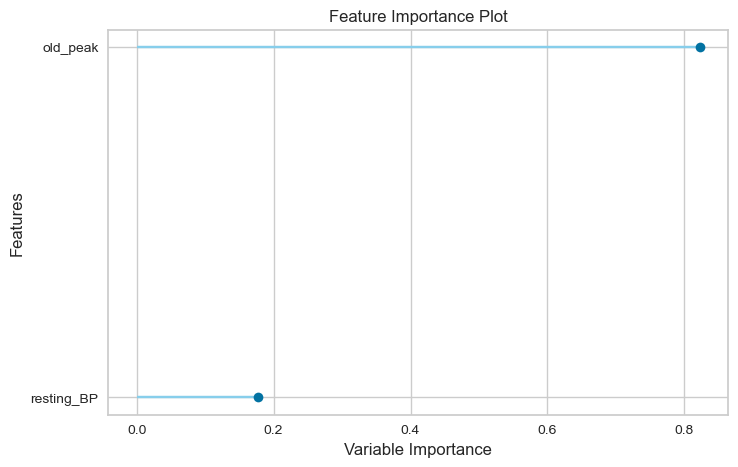

In [42]:
plot_model(tuned_model, plot='feature')

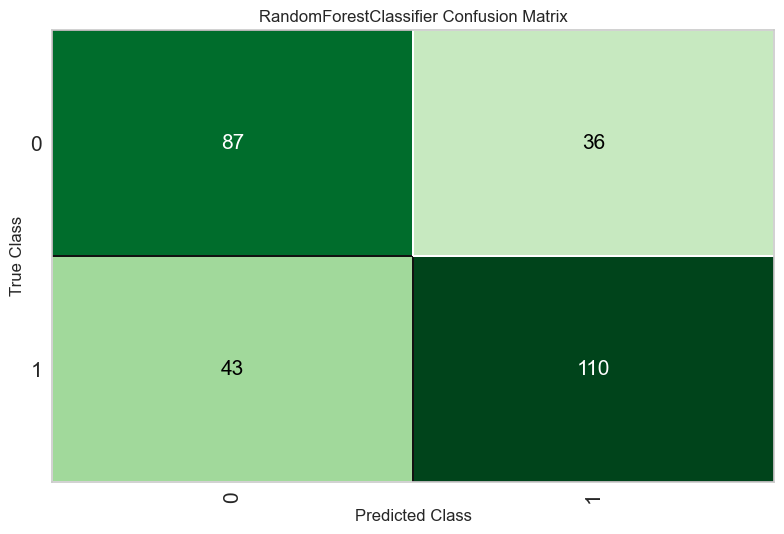

In [43]:
plot_model(tuned_model, plot = 'confusion_matrix')

In [44]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [45]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 4. Generating predictions on unseen data

In [46]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7138,0.7671,0.7190,0.7534,0.7358,0.4239,0.4245


In [47]:
# finalize rf model
final_model = finalize_model(tuned_model)
# print final model parameters
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\matth\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              ver...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,


In [52]:
# copy data and remove target variable
data_unseen = medical.copy()
data_unseen.drop('cv_issue', axis = 1, inplace = True)
predictions = predict_model(final_model, data=data_unseen)
predictions.head(10)

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,prediction_label,prediction_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.8212
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.7338
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.8212
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.7263
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.7084
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0.8212
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,0.8094
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,0.7084
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,0.9777
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0,0.8094


### 5. Saving the Model

In [49]:
# Save the entire pipeline including preprocessing and model
save_model(final_model, 'final_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\matth\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ver...
                  RandomForestClassifier(bootstrap=True, c

### 6. Enabling Experiment Logging

In [50]:
import mlflow
import joblib
import pickle

# Get the underlying model from the pipeline
base_model = finalize_model(tuned_model)

# Log the finalized model using joblib to save the model
model_filename = "final_model.pkl"
joblib.dump(base_model, model_filename)

# Set the artifact URI scheme to 'http'
mlflow.set_tracking_uri("http://localhost:5000")  # Change the URL accordingly

# Log the serialized model using MLflow
with mlflow.start_run(run_name="PyCaret_Experiment") as mlflow_run:
    mlflow.log_artifact(model_filename, artifact_path="models")

    # Log relevant information, if applicable
    mlflow.log_param("model_name", "PyCaret Model")
    mlflow.log_param("data_preprocessing", "Yes")
    mlflow.log_param("fix_imbalance", "Yes")
    # ... log other relevant parameters and metrics

    mlflow_run_id = mlflow_run.info.run_id
    print("MLFlow Run ID: ", mlflow_run_id)
    
    



MLFlow Run ID:  182af3ed22c54158b31356f41cc20e55


### 7. Registering the Model

________________________

# Predictions Part 2

In [ ]:
saved_final_model = load_model('final_model')

In [ ]:
# predict on new data
new_prediction = predict_model(saved_final_model, data=data_unseen)
new_prediction.head()

In [ ]:
import pandas as pd
from pycaret.classification import *

# Load the saved model
final_model = load_model('final_model')

# Define fixed input values for prediction
input_data = pd.DataFrame({
    'age': [50],
    'gender': ['F'],
    'chest_pain': ['NAP'],
    'resting_BP': [180],
    'cholesterol': [200],
    'fasting_BS': [0],
    'resting_ECG': ['Normal'],
    'max_HR': [180],
    'exercise_angina': ['N'],
    'old_peak': [3.0],
    'ST_slope': ['Flat']
})

# Use the preprocessed input data to make predictions with the loaded model
prediction_result = predict_model(final_model, data=input_data)

# Get the column name of the prediction result (it might be different from 'Label')
prediction_column = prediction_result.columns[-1]

# Extract the actual prediction class label (0 or 1)
prediction_label = int(prediction_result.iloc[0][prediction_column])

print(f"Predicted class: {prediction_label}")

# Get the column name of the prediction score (it might be different from 'Score')
score_column = prediction_result.columns[-1]

# Extract the actual prediction score (probability of positive class)
prediction_score = float(prediction_result.iloc[0][score_column])

print(f"Predicted score: {prediction_score}")

# Calculate accuracy
actual_label = 1  # Assuming the actual label is 1 (positive class)
correct_prediction = (prediction_label == actual_label)
accuracy = correct_prediction

print(f"Accuracy: {accuracy}")
